In [185]:
import torch

def print_tensor_detail(t : torch.tensor):
    print("type : ", type(t))
    print("t : ", t, sep='\n')
    print("t.shape : ", t.shape)
    print("t.dtype : ", t.dtype)
    print("torch.is_tesnor(t) : ", torch.is_tensor(t))
    print("torch.is_storage(t) : ", torch.is_storage(t))
    print("torch.is_complex(t) : ", torch.is_complex(t))
    print("torch.is_conj(t) : ", torch.is_conj(t))
    print("torch.is_floating_point(t) : ", torch.is_floating_point(t))
    print("torch.numel(t) : ", torch.numel(t))
    if torch.numel(t) == 1:
        print("torch.is_nonzero(t) : ", torch.is_nonzero(t))

# Tensor

- 대수학에서 텐서(Tensor)란 수를 담을 수 있는 다차원 배열이다.
- 텐서는 스칼라, 벡터, 행렬, 그 이상의 차원을 가진 구조체를 모두 아울러 부르는 말이다.
- 텐서 안의 어떤 숫자를 고르기 위해 필요한 인덱스의 수를 랭크라 한다.
  - 스칼라(Scalar): 랭크 0의 텐서이다. 1 개의 값을 나타낸다.
    - 예를 들어 숫자 $t=3.14159$.
    - 배열이 아니므로 인덱스가 필요없다.
  - 벡터(Vector): 랭크 1의 텐서이다. 1차원 값의 배열이다.
    - 예를 들어 $t=[1, 2, 3]$.
    - 두 번째 수 $2$를 얻어내려면 `t[1]`과 같이 한 개의 인덱스가 필요하다.
  - 행렬(Matrix): 랭크 2의 텐서이다. 2차원 값의 배열을 나타낸다.
    - 예를 들어 $t=\begin{bmatrix}1 & 2 \\3 & 4\end{bmatrix}$.
    - 2행 1열에 배정된 숫자 $3$을 얻어내려면 `t[1, 0]`과 같이 두 개의 인덱스가 필요하다.
  - 고차원 텐서(Higher-order tensors): 랭크 3 이상의 텐서이다. 여러 차원의 값의 배열이다.

## torch.Tensor

- torch 패키지는 텐서 객체와 연산을 지원한다.
- torch의 텐서는 `torch.tensor()` 메서드로 생성한다.

In [186]:
import torch

# torch.tensor(
#     data, 
#     *, 
#     dtype=None, 
#     device=None, 
#     requires_grad=False, 
#     pin_memory=False) → Tensor
torch.tensor([1,2])

tensor([1, 2])

- 값이 하나 뿐인 스칼라 텐서는 값이 하나만 들어있는 배열을 `data` 인수로 넣어 정의할 수 있다.

In [187]:
print_tensor_detail(torch.tensor([3.14159]))

type :  <class 'torch.Tensor'>
t : 
tensor([3.1416])
t.shape :  torch.Size([1])
t.dtype :  torch.float32
torch.is_tesnor(t) :  True
torch.is_storage(t) :  False
torch.is_complex(t) :  False
torch.is_conj(t) :  False
torch.is_floating_point(t) :  True
torch.numel(t) :  1
torch.is_nonzero(t) :  True


- 벡터를 나타내는 텐서는 값이 여럿 들어있는 배열을 `data`인수로 넣어 정의할 수 있다.
- 벡터를 나타내는 텐서는 `t[index]`로 내부에 들어있는 스칼라 탠서를 액세스 할 수 있다.
- 파이선의 일반 배열과 동일하게 음수 인덱싱이 가능하며, 슬라이스도 할 수 있다.
- 텐서는 가변형이다. 인덱싱과 함께 배정 연산을 할 수 있다.

In [188]:
t = torch.tensor([1, 2, 3, 4])
print_tensor_detail(t)
print("t[0] : ", t[0])
print("t[3] : ", t[3])
# print("t[4] : ", t[4]) # IndexError
print("t[-1] : ", t[-1])
print("t[-4] : ", t[-4])
# print("t[-5] : ", t[-5]) # IndexError
print("t[:2] : ", t[:2])
print("t[1:2] : ", t[1:2])

t[0] = 0
t

type :  <class 'torch.Tensor'>
t : 
tensor([1, 2, 3, 4])
t.shape :  torch.Size([4])
t.dtype :  torch.int64
torch.is_tesnor(t) :  True
torch.is_storage(t) :  False
torch.is_complex(t) :  False
torch.is_conj(t) :  False
torch.is_floating_point(t) :  False
torch.numel(t) :  4
t[0] :  tensor(1)
t[3] :  tensor(4)
t[-1] :  tensor(4)
t[-4] :  tensor(1)
t[:2] :  tensor([1, 2])
t[1:2] :  tensor([2])


tensor([0, 2, 3, 4])

- 행렬을 나타내는 텐서는 배열의 배열을 `data`인수로 넣어 정의할 수 있다.
- 바깥쪽 배열의 아이템은 각각의 행을 나타낸다.
- 따라서 다음 코드는 $\begin{bmatrix}1&2&3\\4&5&6\end{bmatrix}$을 정의한다.
- 행렬을 나타내는 텐서는 `t[index_row]`로 행 벡터 텐서를 구할 수 있다.
- 행렬을 나타내는 텐서는 `t[index_row, index_column]`으로 각 원소의 스칼라 텐서를 구할 수 있다.
- 행렬을 나타내는 텐서는 `t[:, index_column]`으로 열 벡터 텐서를 슬라이스 할 수 있다.
- 행렬을 나타내는 텐서는 `t[a:b, c:d]`로 $(b-a) \times (d-c)$크기의 부분 행렬을 슬라이스 할 수 있다.

In [189]:
# 1 2 3
# 4 5 6
t = torch.tensor([[1,2,3],[4,5,6]])
print_tensor_detail(t)
print("t[0] : ", t[0]) # 1행
print("t[1] : ", t[1]) # 2행
print("t[0, 0] : ", t[0, 0]) # 1행 1열
print("t[1, 2] : ", t[1, 2]) # 2행 3열
print("t[:,0] : ", t[:,0]) # 1열
print("t[:,1] : ", t[:,1]) # 2열
print("t[:,2] : ", t[:,2]) # 3열
print("t[0:1, 1:3] : ", t[0:1, 1:3]) # (1 x 2) 크기의 부분 행렬

type :  <class 'torch.Tensor'>
t : 
tensor([[1, 2, 3],
        [4, 5, 6]])
t.shape :  torch.Size([2, 3])
t.dtype :  torch.int64
torch.is_tesnor(t) :  True
torch.is_storage(t) :  False
torch.is_complex(t) :  False
torch.is_conj(t) :  False
torch.is_floating_point(t) :  False
torch.numel(t) :  6
t[0] :  tensor([1, 2, 3])
t[1] :  tensor([4, 5, 6])
t[0, 0] :  tensor(1)
t[1, 2] :  tensor(6)
t[:,0] :  tensor([1, 4])
t[:,1] :  tensor([2, 5])
t[:,2] :  tensor([3, 6])
t[0:1, 1:3] :  tensor([[2, 3]])


- 단위 행렬을 만들고 싶다면 `torch.eye`함수를 사용한다.

In [190]:
# print(torch.eye(-1)) # RuntimeError
print(torch.eye(0))
print(torch.eye(1))
print(torch.eye(2))
print(torch.eye(3))

tensor([], size=(0, 0))
tensor([[1.]])
tensor([[1., 0.],
        [0., 1.]])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


- 행렬 텐서를 정의할 경우, 각 행의 길이는 서로 같아야 한다.

In [191]:
t = torch.tensor([
    [1, 2, 3],
    [4, 5]
]) # ValueError

ValueError: expected sequence of length 3 at dim 1 (got 2)

- `tensor()`의 `dtype` 인수로 데이터의 형식을 직접 지정할 수도 있다.
- `dtype=None`인 경우 데이터로 부터 `dtype`을 추론한다.

In [ ]:
# torch.tensor() # TypeError: tensor() missing 1 required positional arguments: "data"
print(torch.tensor([1,2,3]), torch.tensor([1,2,3]).dtype)
print(torch.tensor([1.0,2.0,3.0]), torch.tensor([1.0,2.0,3.0]).dtype)
print(torch.tensor([1,2,2.4]), torch.tensor([1,2,2.4]).dtype)
print(torch.tensor([True,False]), torch.tensor([True, False]).dtype)
print(torch.tensor([0,1,2], dtype=torch.bool), torch.tensor([1,2,3], dtype=torch.bool).dtype)

tensor([1, 2, 3]) torch.int64
tensor([1., 2., 3.]) torch.float32
tensor([1.0000, 2.0000, 2.4000]) torch.float32
tensor([ True, False]) torch.bool
tensor([False,  True,  True]) torch.bool


- `tensor()`의 `device` 인수로 텐서가 배정될 장치를 결정할 수 있다.
- `device=None`인 경우 `torch.set_default_device()`로 미리 설정해둔 기본값을 사용한다.

In [ ]:
print(torch.tensor([1,2,3]).device)
print(torch.tensor([1,2,3], device="cpu").device)
print(torch.tensor([1,2,3], device="cuda").device)

cpu
cpu
cuda:0


- `torch.Tensor()` 생성자를 직접 호출하여 텐서를 생성할 수도 있으나,
- `torch.Tensor()`는 입력받은 데이터의 형식에 상관없이 `dtype`이 `torch.FloatTensor()`로 고정된다.
- 그런 이유로 `torch.tensor()`를 사용하는 편이 더 낫다

In [ ]:
import torch

data = [1,2,3]
tensor = torch.tensor(data)
Tensor = torch.Tensor(data)
print(tensor, tensor.dtype)
print(Tensor, Tensor.dtype)
print(torch.Tensor([True, False]))


tensor([1, 2, 3]) torch.int64
tensor([1., 2., 3.]) torch.float32
tensor([1., 0.])


- 텐서의 규격은 `tensor.shape`로 구할 수 있다.
- 규격은 고차원의 규격부터 순서대로 나타난다.
- 예를 들어 다음 코드의 텐서 `t`는 랭크 3의 텐서이며, 그 크기는 $2 \times 3 \times 4$이다. 
- 인덱싱을 할 때도 고차원의 인덱스부터 순서대로 쓴다.
- 따라서 $7$을 구하려면 `t[0, 1, 2]`로 쓴다.

In [ ]:
t = torch.Tensor([[
    [1,2,3,4],
    [5,6,7,8],
    [9,10,11,12],
],
[
    [-1,-2,-3,-4],
    [-5,-6,-7,-8],
    [-9,-10,-11,-12],
]
])
print(t.shape)
print(t[0,1,2])

torch.Size([2, 3, 4])
tensor(7.)


- `torch.empty()`를 통해 값을 초기화하지 않은 텐서를 만들 수 있다.
- `torch.zeros()`를 통해 $0$으로 가득한 텐서를 만들 수 있다.
- `torch.ones()`를 통해 $1$로 가득한 텐서를 만들 수 있다.
- `torch.full(size, fill_value)`를 통해 `fill_value`로 가득한 텐서를 만들 수 있다.

In [ ]:
print("torch.empty(2,2) : ", torch.empty(2, 2))
print("torch.zeros(3,2) : ", torch.zeros(3 ,2))
print("torch.ones(2,3) : ", torch.ones(2, 3))
print("torch.full((3,3), 42) : ", torch.full((3,3), 42))

torch.empty(2,2) :  tensor([[1.5412e-37, 5.9555e-43],
        [5.7397e-42, 0.0000e+00]])
torch.zeros(3,2) :  tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
torch.ones(2,3) :  tensor([[1., 1., 1.],
        [1., 1., 1.]])
torch.full((3,3), 42) :  tensor([[42, 42, 42],
        [42, 42, 42],
        [42, 42, 42]])


- 위에서 언급한 `empty()`, `zeros()`, `ones()`, `full()`은 각각의 `_like`버전인 `empty_like()`, `zeros_like()`, `ones_like()`, `full_like()`가 있다. 이 함수들은 텐서의 크기를 받는 대신, 이미 초기화된 다른 텐서를 받아 그 텐서와 같은 크기이지만 값만 각각의 규칙으로 채운 텐서를 반환한다.

In [ ]:
sample_tensor = torch.eye(3)
print("torch.empty_like(sample_tensor) : ", torch.empty_like(sample_tensor))
print("torch.zeros_like(sample_tensor) : ", torch.zeros_like(sample_tensor))
print("torch.ones_like(sample_tensor) : ", torch.ones_like(sample_tensor))
print("torch.full_like(sample_tensor, 42) : ", torch.full_like(sample_tensor, 42))

torch.empty_like(sample_tensor) :  tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.zeros_like(sample_tensor) :  tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.ones_like(sample_tensor) :  tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
torch.full_like(sample_tensor, 42) :  tensor([[42., 42., 42.],
        [42., 42., 42.],
        [42., 42., 42.]])


- `torch.asarray(obj)`를 통해 임의의 객체를 텐서로 전환할 수 있다.
- 특히 `numpy.ndarray`와 같이 파이선의 버퍼 프로토콜을 구현하는 객체인 경우, 데이터를 복사하는 대신 `obj`의 데이터 메모리를 공유한다.
- 이 외에도 유사한 함수로 `from_numpy`, `from_dlpack`, `frombuffer`, `as_tensor`, `as_strided` 등이 있다.

In [ ]:
import numpy

array = numpy.array([1, 2, 3])
print(array)
# Shares memory with array 'array'
t1 = torch.asarray(array)
print(t1)
print(array.__array_interface__['data'][0] == t1.data_ptr())
# Copies memory due to dtype mismatch
t2 = torch.asarray(array, dtype=torch.float32)
print(t2)
print(array.__array_interface__['data'][0] == t1.data_ptr())

scalar = numpy.float64(0.5)
torch.asarray(scalar)

[1 2 3]
tensor([1, 2, 3], dtype=torch.int32)
True
tensor([1., 2., 3.])
True


tensor([0.0000, 1.7500])

- `torch.arange(start, end, step)`를 통해 $[\text{start}, \text{end})$ 사이의 수를 포함하는 벡터 텐서를 만들 수 있다.
- 만들어지는 텐서의 크기는 다음 공식으로 구할 수 있다.
$$\Bigg\lceil{\frac{\text{end} - \text{start}}{step}}\Bigg\rceil$$
- 예를 들어, `(0, 10, 2)`가 입력된 경우 크기는 $5$이다.
  $$\Bigg\lceil{\frac{\text{10} - \text{0}}{2}}\Bigg\rceil=5$$

In [ ]:
print("torch.arange(0, 10, 2) : ", torch.arange(0, 10, 2))

torch.arange(0, 10, 2) :  tensor([0, 2, 4, 6, 8])


- 원소 사이의 간격 `step`을 지정하여 임의의 크기의 텐서를 구하였던 `arange`와는 반대로,
- `torch.linespace(start, end, steps)`는 텐서의 크기를 지정하여 `step`을 계산하도록 한다.
- 원소 수열의 일반식은 다음과 같이 정의한다.
  $$t : (a_0, a_1 \cdots a_{steps-1})$$
  $$a_i = \text{start} + \frac{(\text{end}-\text{start})}{\text{steps}-1} * i$$
- 예를 들어 `linespace(3,10,5)`인 경우 각 원소는 다음과 같다.
  - $a_0 = 3 + 1.75 * 0 = 3$
  - $a_1 = 3 + 1.75 * 1 = 4.75$
  - $a_2 = 3 + 1.75 * 2 = 6.5$
  - $a_3 = 3 + 1.75 * 3 = 8.25$
  - $a_4 = 3 + 1.75 * 4 = 10$

In [ ]:
print("torch.linspace(3, 10, 5) : ", torch.linspace(3, 10, steps=5))

torch.linspace(3, 10, 5) :  tensor([ 3.0000,  4.7500,  6.5000,  8.2500, 10.0000])


- `torch.logspace(start, end, steps, base=10)`는 `linespace`와 사용법이 유사하다.
- 다만, 각 원소를 계산할 때 지수의 밑(`base`)을 사용하며, 원소의 값을 계산하는 공식이 다르다.
- `logspace`를 통해 생성된 텐서의 원소들은 로그 공간에서 간격이 균등하게 분포한다.
- 즉, 인접한 두 원소의 지수의 차가 균일하다는 뜻이다.
  $$t : (a_0, a_1 \cdots a_{steps-1})$$
  $$a_i = \text{base}^{\text{start} + \frac{(\text{end}-\text{start})}{\text{steps}-1} * i}$$
- 위 공식에서 지수부가 `linespace`의 $a_i$과 동일함을 확인할 수 있다
- 예를 들어 `torch.logspace(-10, 10, 5)`인 경우 각 원소는 다음과 같다.
  - $a_0 = 10^{-10 + 5 * 0} = 10^{-10}$
  - $a_1 = 10^{-10 + 5 * 1} = 10^{-5}$
  - $a_2 = 10^{-10 + 5 * 2} = 10^{0}$
  - $a_3 = 10^{-10 + 5 * 3} = 10^{5}$
  - $a_4 = 10^{-10 + 5 * 4} = 10^{10}$

In [ ]:
torch.logspace(start=-10, end=10, steps=5)

tensor([1.0000e-10, 1.0000e-05, 1.0000e+00, 1.0000e+05, 1.0000e+10])

- `torch.quantize_per_tensor()`, `torch.quantize_per_channel()`는 텐서의 모든 실수 원소를 정수 양자화(quantize) 한다.
- 양자화된 텐서는 `torch.quint8`, `torch.qint8`, `torch.qint32` 세 타입 중 하나의 타입을 가진다.
- `torch.dequantize()`는 양자화된 텐서를 32비트 플로트 텐서로 되돌린다.

In [ ]:
print(torch.quantize_per_tensor(torch.tensor([-1.0, 0.0, 1.0, 2.0]), 0.1, 10, torch.quint8))
print(torch.quantize_per_tensor(torch.tensor([-1.0, 0.0, 1.0, 2.0]), 0.1, 10, torch.quint8).int_repr())
print(torch.quantize_per_tensor([torch.tensor([-1.0, 0.0]), torch.tensor([-2.0, 2.0])], torch.tensor([0.1, 0.2]), torch.tensor([10, 20]), torch.quint8))
print(torch.quantize_per_tensor(torch.tensor([-1.0, 0.0, 1.0, 2.0]), torch.tensor(0.1), torch.tensor(10), torch.quint8))
print("="*80)
x = torch.tensor([[-1.0, 0.0], [1.0, 2.0]])
print(torch.quantize_per_channel(x, torch.tensor([0.1, 0.01]), torch.tensor([10, 0]), 0, torch.quint8))
print(torch.quantize_per_channel(x, torch.tensor([0.1, 0.01]), torch.tensor([10, 0]), 0, torch.quint8).int_repr())
print("="*80)
print(torch.dequantize(x))

tensor([-1.,  0.,  1.,  2.], size=(4,), dtype=torch.quint8,
       quantization_scheme=torch.per_tensor_affine, scale=0.1, zero_point=10)
tensor([ 0, 10, 20, 30], dtype=torch.uint8)
(tensor([-1.,  0.], size=(2,), dtype=torch.quint8,
       quantization_scheme=torch.per_tensor_affine, scale=0.10000000149011612,
       zero_point=10), tensor([-2.,  2.], size=(2,), dtype=torch.quint8,
       quantization_scheme=torch.per_tensor_affine, scale=0.20000000298023224,
       zero_point=20))
tensor([-1.,  0.,  1.,  2.], size=(4,), dtype=torch.quint8,
       quantization_scheme=torch.per_tensor_affine, scale=0.10000000149011612,
       zero_point=10)
tensor([[-1.,  0.],
        [ 1.,  2.]], size=(2, 2), dtype=torch.quint8,
       quantization_scheme=torch.per_channel_affine,
       scale=tensor([0.1000, 0.0100], dtype=torch.float64),
       zero_point=tensor([10,  0]), axis=0)
tensor([[  0,  10],
        [100, 200]], dtype=torch.uint8)
tensor([[-1.,  0.],
        [ 1.,  2.]])


- `torch.complex`는 실수부를 나타내는 텐서와 허수부를 나타내는 텐서를 조합하여 복소수 텐서를 만든다.
- 두 텐서의 크기는 서로 같아야 한다.

In [ ]:
real = torch.tensor([1, 2], dtype=torch.float32)
imag = torch.tensor([3, 4], dtype=torch.float32)
z = torch.complex(real, imag)
print_tensor_detail(z)

type :  <class 'torch.Tensor'>
t : 
tensor([1.+3.j, 2.+4.j])
t.shape :  torch.Size([2])
t.dtype :  torch.complex64
torch.is_tesnor(t) :  True
torch.is_storage(t) :  False
torch.is_complex(t) :  True
torch.is_conj(t) :  False
torch.is_floating_point(t) :  False
torch.numel(t) :  2


- `torch.polar(abs, angle)`는 다음과 같이 극분해(polar decomposition)을 수행한다.
  - ※ 선형대수학과 함수해석학에서 극분해(極分解, 영어: polar decomposition)는 복소수 정사각 행렬 또는 두 복소수 힐베르트 공간 사이의 유계 작용소를, “절댓값”과 “편각”으로 분해하는 과정이다. 여기서, “절댓값” 성분은 항상 음이 아닌 고윳값을 가지는 자기 수반 작용소이며, “편각” 성분은 그 핵의 직교 여공간과 치역 사이의 유니터리 변환을 정의한다.
- `abs`는 음수이거나 `NaN`일 수 없다.
- `angle`은 무한일 수 없다.

$$
\text{out} = abs(\cos{\text{angle}} + i\sin{\text{angle}})
$$

In [ ]:
import numpy as np
abs = torch.tensor([1, 2], dtype=torch.float64)
angle = torch.tensor([np.pi / 2, 5 * np.pi / 4], dtype=torch.float64)
z = torch.polar(abs, angle)
z

tensor([ 6.1232e-17+1.0000j, -1.4142e+00-1.4142j], dtype=torch.complex128)

- `torch.heaviside(input, values, *, out=None)`는 텐서에 단위 계단 함수(Heaviside step function)를 적용한다.

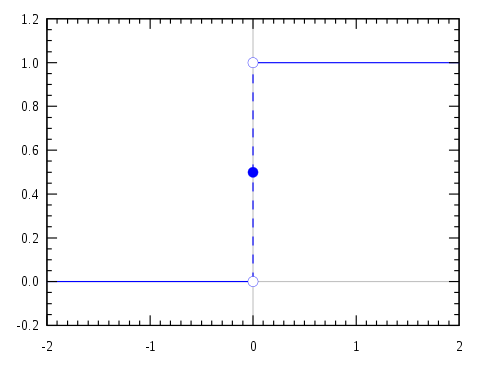

$$
\text{heaviside}(input, values) = \begin{cases}
0&(\text{if }input < 0)\\
values&(\text{if }input = 0)\\
1&(\text{if }input > 0)
\end{cases}
$$

In [ ]:
input = torch.tensor([-1.5, 0, 2.0])
print(input)
print("="*40)
values = torch.tensor([0.5])
print("values : ", values)
print("heaviside : ", torch.heaviside(input, values))
print("="*40)
values = torch.tensor([1.2, -2.0, 3.5])
print("values : ", values)
print("heaviside : ", torch.heaviside(input, values))

tensor([-1.5000,  0.0000,  2.0000])
values :  tensor([0.5000])
heaviside :  tensor([0.0000, 0.5000, 1.0000])
values :  tensor([ 1.2000, -2.0000,  3.5000])
heaviside :  tensor([ 0., -2.,  1.])


- `torch.adjoint`는 복소수 행렬을 입력받아 켤레 전치를 구한다.
- 켤레 전치는 adjoint 혹은 conjugate transpose 혹은 Hermitian transpose라고도 불린다.


In [ ]:
x = torch.arange(4, dtype=torch.float)
A = torch.complex(x, x).reshape(2, 2)
print(A)
print(A.adjoint())
print(A.adjoint() == A.mH.all())

tensor([[0.+0.j, 1.+1.j],
        [2.+2.j, 3.+3.j]])
tensor([[0.-0.j, 2.-2.j],
        [1.-1.j, 3.-3.j]])
tensor([[ True, False],
        [False, False]])
